In [58]:
import csv
import pickle

run_to_library = dict()
library_to_run = dict()
with open('kang_metadata.tsv', mode='r') as infile:
    reader = csv.DictReader(infile)
    mydict = [row for row in reader]

for patient in mydict:
    sample = patient['Library Name']
    run = patient['Run']
    run_to_library[run] = sample
    library_to_run[sample] = run
    
results_file = "kang_on_kleb.tsv"
cutoff = 95

def get_times_from_usrbintime(f):
    user_time = 0
    cpu_time = 0
    max_rss = 0
    wall_time = 0
    for line in open(f, 'r'):
        if 'User time' in line:
            user_time = float(line.split(':')[-1].rstrip())
        elif 'System time' in line:
            system_time = float(line.split(':')[-1].rstrip())
            cpu_time = user_time + system_time
        elif 'Maximum resident' in line:
            max_rss = round(float(line.split(':')[-1].rstrip())/1000000,2)
        elif 'wall clock' in line:
            str_time = line.split()[-1].rstrip()
            str_time = str_time.split(':');
            if len(str_time) == 3:
                wall_time = float(str_time[0]) * 3600 + float(str_time[1]) * 60 + float(str_time[2].rstrip())
            else:
                wall_time = float(str_time[0]) * 60 + float(str_time[1].rstrip())
    if cpu_time > 1:
        cpu_time = int(cpu_time)

    return [int(wall_time), int(cpu_time), max_rss]

In [59]:
samples_504 = ['MBH045',
'MBH048',
'MBH058',
'MBH065',
'MBH072',
'MBS1117',
'MBS1155',
'MHH262',
'MHH345',
'MHH368',]

samples_505 = [
'MBH064',
'MBH071',
'MBH075',
'MBH082',
'MBH086',
'MBS1138',
'MHH247',
'MHH328',
'MHH363',
'MHH389',
'MHH582',
'MHH630',]

sample_506 =[
'MBH067',
'MBH074',
'MBH080',
'MBH087',
'MBH098',
'MBS1153',
'MHH254',
'MHH341',
'MHH377',
'MHH390',
'MHH598',
'MHS133',]

samples_507 = [
'MBH077',
'MBH079',
'MBH088',
'MBH096',
'MBS1122',
'MBS1157',
'MHH267',
'MHH355',
'MHH382',
'MHH391',
'MHH599',
'MHS140']

all_samples = [samples_504, samples_505, sample_506, samples_507]

for sample_l in all_samples:
    for sample in sample_l:
        if sample in library_to_run:
            run = library_to_run[sample]
            print(run)

ERR8609775
ERR8609778
ERR8609788
ERR8609795
ERR8609802
ERR8609831
ERR8609869
ERR8609904
ERR8609935
ERR8609958
ERR8609794
ERR8609801
ERR8609805
ERR8609812
ERR8609816
ERR8609852
ERR8609889
ERR8609918
ERR8609953
ERR8609979
ERR8610055
ERR8610103
ERR8609797
ERR8609804
ERR8609810
ERR8609817
ERR8609828
ERR8609867
ERR8609896
ERR8609931
ERR8609967
ERR8610071
ERR8610119
ERR8609807
ERR8609809
ERR8609818
ERR8609826
ERR8609836
ERR8609871
ERR8609909
ERR8609945
ERR8609972
ERR8609980
ERR8610072
ERR8610125


In [60]:
from dataclasses import dataclass

@dataclass
class nn_res:
    ani: float
    run: str
    mag: str
    eff_cov: float

all_results = []
runs_with_kleb = set()
runs_with_kleb_to_cov = dict()
f = open(results_file,'r')
next(f)
for line in f:
    if 'ANI' in line:
        continue
    spl = line.split()
    ani = float(spl[2])
    eff_cov = float(spl[5])
    run = spl[0].split('/')[-1].split('_')[0]
    mag = spl[1].split('/')[-1]
    all_results.append(nn_res(ani,run,mag,eff_cov))
    runs_with_kleb.add(run)
    runs_with_kleb_to_cov[run] = (eff_cov, ani)

In [63]:
runs_with_kleb_screen = set()
run_to_ani_mash = dict()
run_to_rel_abund = dict()
f = open('mash_screen_on_kleb.txt','r')
for line in f:
    print(line)
    spl = line.split()
    spl = spl[0].split(':')
    path = spl[0]
    ani = float(spl[1]) * 100
    run = path.split('/')[-1].split('_')[0]
    if ani >= cutoff:
        runs_with_kleb_screen.add(run)
    run_to_ani_mash[run] = ani


from glob import glob
for file in glob('./metaphlan_results/*'):
    run = file.split('/')[-1].split('_')[0]
    for line in open(file,'r'):
        if 'SGB10115' in line:
            run_to_rel_abund[run] = float(line.split()[2])

mash_screen_out/ERR8609775_cat.fastq.gz.res:0.990016	810/1000	218	0	gtdb_genomes_reps_r214/database/GCF/000/742/135/GCF_000742135.1_genomic.fna.gz	[5 seqs] NZ_KN046818.1 Klebsiella pneumoniae strain ATCC 13883 scaffold1, whole genome shotgun sequence [...]

mash_screen_out/ERR8609778_cat.fastq.gz.res:0.990016	810/1000	5	0	gtdb_genomes_reps_r214/database/GCF/000/742/135/GCF_000742135.1_genomic.fna.gz	[5 seqs] NZ_KN046818.1 Klebsiella pneumoniae strain ATCC 13883 scaffold1, whole genome shotgun sequence [...]

mash_screen_out/ERR8609788_cat.fastq.gz.res:0.956501	393/1000	1	0	gtdb_genomes_reps_r214/database/GCF/000/742/135/GCF_000742135.1_genomic.fna.gz	[5 seqs] NZ_KN046818.1 Klebsiella pneumoniae strain ATCC 13883 scaffold1, whole genome shotgun sequence [...]

mash_screen_out/ERR8609794_cat.fastq.gz.res:0.886679	80/1000	1	7.63909e-232	gtdb_genomes_reps_r214/database/GCF/000/742/135/GCF_000742135.1_genomic.fna.gz	[5 seqs] NZ_KN046818.1 Klebsiella pneumoniae strain ATCC 13883 scaffold1, w

In [71]:
sylph_pass = 0
mash_pass = 0
for sample_l in all_samples:
    print('NEW')
    for sample in sample_l:
        if sample in library_to_run:
            run = library_to_run[sample]
            if run in runs_with_kleb:
                print(run,' contained', runs_with_kleb_to_cov[run], run in runs_with_kleb_screen, run in run_to_rel_abund)
                sylph_pass += 1
            else:
                print(run,' not',run in runs_with_kleb_screen, run in run_to_rel_abund)
            if run in runs_with_kleb_screen:
                mash_pass += 1
metaphlan_pass = len(run_to_rel_abund)
#print(mash_pass, sylph_pass, metaphlan_pass)


NEW
ERR8609775  contained (151.639, 99.28) True True
ERR8609778  contained (4.066, 99.22) True True
ERR8609788  contained (0.622, 99.08) True True
ERR8609795  contained (3.003, 98.81) True True
ERR8609802  contained (0.758, 98.96) True True
ERR8609831  contained (7.802, 99.2) True True
ERR8609869  contained (0.717, 99.19) True True
ERR8609904  contained (0.83, 98.96) True True
ERR8609935  contained (13.703, 99.23) True True
ERR8609958  contained (1.532, 99.39) True True
NEW
ERR8609794  contained (0.173, 96.61) False True
ERR8609801  contained (0.382, 98.84) False True
ERR8609805  contained (0.764, 98.98) True True
ERR8609812  contained (36.377, 99.22) True True
ERR8609816  contained (71.324, 99.17) True True
ERR8609852  not False False
ERR8609889  contained (13.301, 99.13) True True
ERR8609918  contained (8.352, 99.23) True True
ERR8609953  contained (8.542, 99.17) True True
ERR8609979  contained (20.77, 99.3) True True
ERR8610055  contained (0.826, 99.13) True True
ERR8610103  contain

In [65]:
time_sylph_sketch = get_times_from_usrbintime('./times/sylph_sketch_gtdb.time')
time_sylph_sketch_reads = get_times_from_usrbintime('./times/sylph_sketch_reads.time')
time_sylph_contain = get_times_from_usrbintime('./times/sylph_contain_gtdb.time')

time_mash_sketch = get_times_from_usrbintime('./times/mash_sketch_gtdb_time.time')
time_mash_screen = get_times_from_usrbintime('./times/mash_screen_gtdb.time')

time_metaphlan = get_times_from_usrbintime('./times/metaphlan_20_threads_time.time')

print(time_sylph_sketch)
print(time_sylph_sketch_reads)
print(time_sylph_contain)

print(time_mash_sketch)
print(time_mash_screen)

print(time_metaphlan)

[91, 1581, 21.71]
[348, 2288, 2.83]
[120, 1554, 9.57]
[414, 8213, 2.13]
[10565, 37465, 17.55]
[26640, 350263, 18.31]


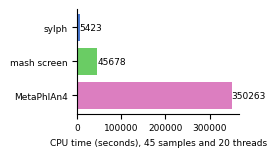

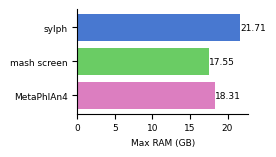

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
wall = False
log_scale = False
cmap = sns.color_palette("muted")
colours = [cmap[0], cmap[2], cmap[6]]

sylph_times = [time_sylph_sketch, time_sylph_sketch_reads, time_sylph_contain]
mash_times = [time_mash_sketch, time_mash_screen]
sylph_times = [time_sylph_sketch, [time_sylph_sketch_reads[0] + time_sylph_contain[0],
                                   time_sylph_sketch_reads[1] + time_sylph_contain[1], max(time_sylph_sketch_reads[2],time_sylph_contain[2])]]
sylph_times = [time_sylph_sketch_reads[0] + time_sylph_contain[0] + time_sylph_sketch[0],
                                   time_sylph_sketch_reads[1] + time_sylph_contain[1] + time_sylph_sketch[1], max(time_sylph_sketch[2], time_sylph_sketch_reads[2],time_sylph_contain[2])]

mash_times = [time_mash_sketch[0] + time_mash_screen[0], time_mash_sketch[1] + time_mash_screen[1], max(time_mash_screen[2], time_mash_screen[2])]
labels = ["sylph",'mash screen', "MetaPhlAn4"]

cm = 1/2.54  # centimeters in inches
plt.rcParams.update({'font.size': 6.5})
plt.rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(7*cm, 4*cm))
    
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

if wall:
    bars = plt.barh([3,2,1], [sylph_times[0]] + [mash_times[0]] +  [time_metaphlan[0]],
                    log=log_scale, label=labels, tick_label = labels , color = colours)
    plt.xlabel("Wall time (seconds), 45 samples and 20 threads")
else:
    bars = plt.barh([3,2,1], [sylph_times[1]] + [mash_times[1]] +  [time_metaphlan[1]],
                    log=log_scale, label=labels, tick_label = labels , color = colours)
    plt.xlabel("CPU time (seconds), 45 samples and 20 threads")
plt.bar_label(bars)
#plt.title('Runtimes and memory over 45 samples')
plt.savefig(f'figures/times_cpu_504-507.svg')

plt.figure(figsize=(7*cm, 4*cm))

ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
bars = plt.barh([3,2,1], [sylph_times[2]] + [mash_times[2]] +  [time_metaphlan[2]],
                    log=False, label=labels, tick_label = labels , color = colours)
plt.xlabel("Max RAM (GB)")

plt.bar_label(bars)

plt.savefig(f'figures/mem_504-507.svg')

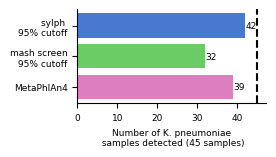

In [160]:
cmap = sns.color_palette("muted")
colours = [cmap[0], cmap[2], cmap[6]]

labels = ["sylph \n95% cutoff", 'mash screen\n 95% cutoff', "MetaPhlAn4"]

cm = 1/2.54  # centimeters in inches
plt.rcParams.update({'font.size': 6.5})
plt.rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(7*cm, 4*cm))
    
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
bars = plt.barh([3,2,1], [sylph_pass, mash_pass, metaphlan_pass],
                    label=labels, tick_label = labels, color = colours)
plt.xlabel("Number of K. pneumoniae\n samples detected (45 samples)")
plt.axvline(45,linestyle='--',c = 'black',label='45 samples')
plt.bar_label(bars)
plt.savefig(f'figures/504-sensitivity.svg')

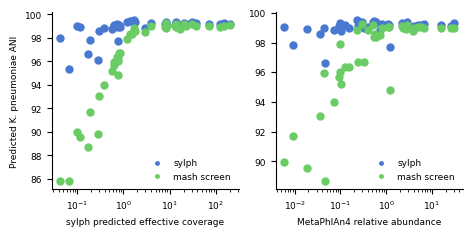

In [149]:
cmap = sns.color_palette("muted")
colours = [cmap[0], cmap[2]]

labels = ["sylph 95% cutoff", 'mash screen 95% cutoff', "MetaPhlan4"]

cm = 1/2.54  # centimeters in inches
plt.rcParams.update({'font.size': 6.5})
plt.rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(12*cm, 6*cm))


eff_covs = []
ani_sylph = []
ani_mash = []

rel_abund = []
ani_sylph_rl = []
ani_mash_rl = []
for sample_l in all_samples:
    for sample in sample_l:
        if sample in library_to_run:
            run = library_to_run[sample]
            if run in runs_with_kleb:# and run in run_to_rel_abund:
                (cov, sani) = runs_with_kleb_to_cov[run]
                eff_covs.append(cov)
                #eff_covs.append(run_to_rel_abund[run])
                ani_sylph.append(sani)
                ani_mash.append(run_to_ani_mash[run])
            if run in runs_with_kleb and run in run_to_rel_abund:
                (cov, sani) = runs_with_kleb_to_cov[run]
                #eff_covs.append(cov)
                rel_abund.append(run_to_rel_abund[run])
                ani_sylph_rl.append(sani)
                ani_mash_rl.append(run_to_ani_mash[run])
ax = plt.subplot(1,2,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(eff_covs, ani_sylph, 'o', c = cmap[0], ms = 5, label='sylph')
plt.plot(eff_covs,ani_mash, 'o', c = cmap[2], ms = 5, label = 'mash screen')
plt.xscale('log')
plt.xlabel("sylph predicted effective coverage")
plt.ylabel("Predicted K. pneumoniae ANI")
plt.legend(frameon=False,markerscale=0.5)

ax = plt.subplot(1,2,2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(rel_abund, ani_sylph_rl, 'o', c = cmap[0], ms = 5, label='sylph')
plt.plot(rel_abund, ani_mash_rl, 'o', c = cmap[2], ms = 5, label = 'mash screen')
plt.xscale('log')
plt.xlabel("MetaPhlAn4 relative abundance")
#plt.yticks([])
lg = plt.legend(frameon=False,markerscale=0.5)
plt.savefig(f'figures/504-cov-abund.svg')

/tmp/ipykernel_11663/2507522190.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


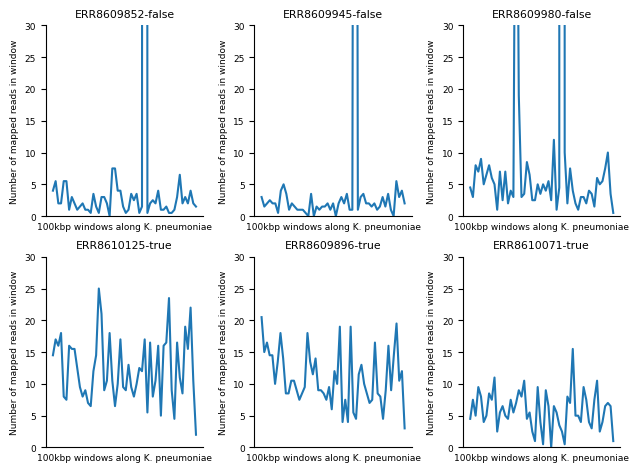

In [193]:
import matplotlib.pyplot as plt
cm = 1/2.54  # centimeters in inches

def extract_positions_from_sam(sam_file):
    """Extract aligned positions from a SAM file."""
    positions = []
    with open(sam_file, 'r') as f:
        for line in f:
            # Skip header lines
            if line.startswith('@'):
                continue
            fields = line.strip().split('\t')
            positions.append(int(fields[3]))
    return positions

def bin_positions(positions, bin_size=100000):
    """Bin positions into buckets of a specified size."""
    max_position = max(positions)
    bins = [0] * ((max_position // bin_size) + 1)

    for pos in positions:
        bin_index = pos // bin_size
        bins[bin_index] += 0.5
    
    return bins

def plot_binned_positions(binned_positions, title, i, bin_size=100000):
    """Plot binned positions as a bar chart."""
    x_labels = [(i*bin_size, (i+1)*bin_size) for i in range(len(binned_positions))]
    x_labels = [f"{a}-{b}" for a, b in x_labels]
    ax = plt.subplot(2,3,i)
    plt.plot(x_labels, binned_positions)
    plt.xlabel(f'100kbp windows along K. pneumoniae')
    plt.ylabel('Number of mapped reads in window')
    plt.xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.ylim([0,30])
    plt.savefig(f'figures/low-cov-sample-dot-cov.svg')
    plt.title(title)
    #plt.show()

if __name__ == "__main__":
    i = 1
    plt.rcParams.update({'font.size': 6.5})
    plt.rcParams.update({'figure.autolayout': True})
    plt.figure(figsize=(16*cm, 12*cm))
    for sam_file_path in glob('./504-sams/*'):
        #sam_file_path = "./504-sams/ERR8609852.sam"  # Replace with your SAM file path
        aligned_positions = extract_positions_from_sam(sam_file_path)
        binned_positions = bin_positions(aligned_positions)
        j = i
        if i == 2:
            j = 6
        elif i == 6:
            j = 2
        else:
            j == i
        title = sam_file_path.split('/')[-1]
        plot_binned_positions(binned_positions, title, j)
        i += 1

    plt.savefig('./figures/uniform_mapping.svg')